In [10]:
%load_ext autoreload
%autoreload 2
import ruamel.yaml as yaml
import os
import sys
os.chdir('..')
print(os.getcwd())
import sys
import json
import pickle
from utils.file_handling import MultiOutput, load_model_from_config
from evaluation.vizualizations import tsne_plot, correlation_plot
from experiment import *
from evaluation.topics import get_topics, npmi_coherence_score, print_top_words, get_most_correlated_topics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/dorian/FER/master_thesis/src/base


In [2]:
MODEL_PATH = 'results/20news/HFVAE/2020-06-12-07:06'
SAVE_PATH = MODEL_PATH
config_path = os.path.join(MODEL_PATH, 'config.yaml')
config = yaml.safe_load(open(config_path, 'r'))
data_path = config['experiment_parameters']['data_path']
model = load_model_from_config(config_path, weights_path=os.path.join(MODEL_PATH, 'model.pt'))
model.eval()
experiment = experiments[config['experiment_parameters']['name']](model, config['experiment_parameters'])


# todo : plot model learning curves
# todo : umap

#### TSNE

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

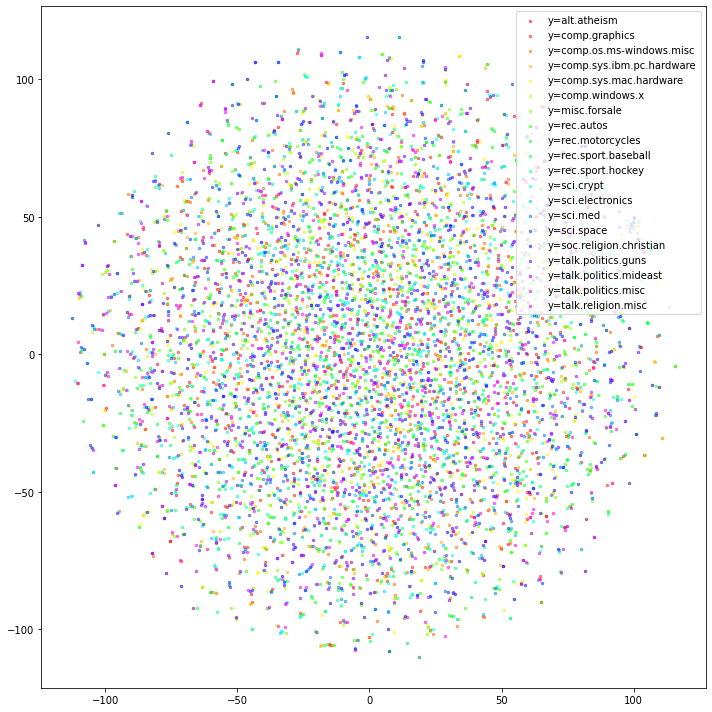

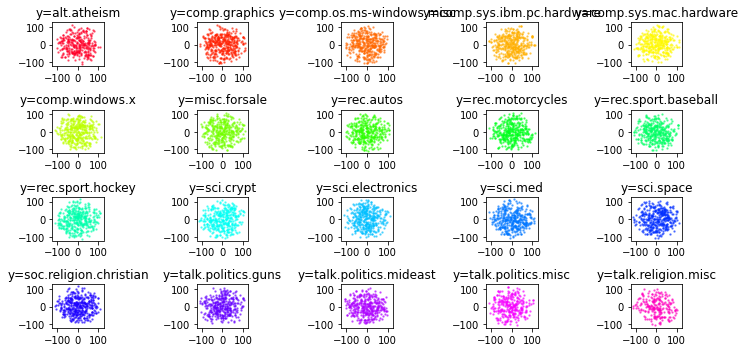

In [5]:
zs, z_mus = experiment.sample_latent(experiment.test_dataloader())
ys = np.load(os.path.join(data_path, 'test.labels.npy'))[:zs.shape[0]]
labels = json.load(open(os.path.join(data_path, 'labels.json'), 'r'))
tsne_plot(zs, ys, labels, show=True, save_path=SAVE_PATH, plot_by_class=True,
          perplexity=10, learning_rate=200, n_iter=2000, n_jobs=-1)

#### Correlation plot

/home/dorian/FER/master_thesis/src/base/evaluation/vizualizations.py:56: RuntimeWarning: invalid value encountered in less
  # plt.imshow(cov_matrix, interpolation='None', cmap='hot')


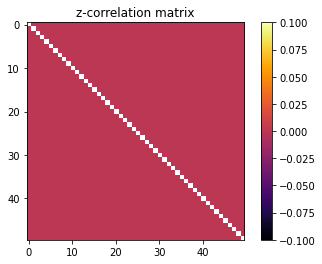

In [6]:
correlation_plot(zs, show=True, save_path=SAVE_PATH)


#### Topics

In [12]:
n_top = 10
vocab = json.load(open(os.path.join(data_path, 'vocab.json'), 'r'))
idx2word = {i: vocab[i] for i in range(len(vocab))}
beta = model.decoder.main[0].weight.cpu().detach().numpy().T
topics = get_topics(beta, idx2word, n_top=n_top)
print_top_words(beta, idx2word, n_top=n_top, save_path=os.path.join(SAVE_PATH, 'topics.txt'))



--------------- Topics ------------------
exist write os human xlib argument resource non book entry
jpeg circuit turkey people spend power motor pgp bad hell
time get state follow bit long subject new world disk
slave instal programming button que spacecraft socket capable cal cool
jim output submit bug capability que comment directory modify distribute
america output car tell weapon win mon nuclear thomas mission
hard drive problem take support hold stl age constitution prohibit
finish gif mm sexual quality compress complain previously catholic stat
say drive tax investment hiv movement war relationship brake health
disk apple professor dealer dos rom kit global vlb window
year package happen plan public play american pay states report
information pub say year number name remote judge position mail
group period space true sound hope final engine amendment detector
compatible minnesota pts pp detroit fpu greece attach improvement economic
format interface entry compile mon energy dist

#### NPMI

In [13]:
word_frequencies = pickle.load(open(os.path.join(data_path, 'word_frequencies.pkl'), 'rb'))
joint_word_frequencies = pickle.load(open(os.path.join(data_path, 'jointword_frequencies.pkl'), 'rb'))
npmi_per_topic = npmi_coherence_score(topics, word_frequencies, joint_word_frequencies)
print(npmi_per_topic)
print(sum(npmi_per_topic) / len(npmi_per_topic))
print('Max: %f' % max(npmi_per_topic))
print('Topic : %s' % (' '.join(topics[np.argmax(npmi_per_topic)])))
# save results
json.dump({'npmi_per_topic': npmi_per_topic, 'avg_npmi': sum(npmi_per_topic) / len(npmi_per_topic),
           'topics': topics},
          open(os.path.join(SAVE_PATH, 'npmi.json'), 'w'), indent=4)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/datasets/20news/new/word_frequencies.pkl'

#### Most correlated topics

In [16]:
inds, covs, cor_topics = get_most_correlated_topics(np.corrcoef(zs.T), top_correlations=4)
for topic in cor_topics:
    print('%d %f %s' % (topic, npmi_per_topic[topic], topics[topic]))

NameError: name 'npmi_per_topic' is not defined